# Linear Regression Using Noramal Equation Method.
This notebook builds Linear Regression Learning Algorithm using Normal Equation Method.  
Every thing goes from scratch using Python based libraries.

### Important imports:

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Getting Data Ready:

In [2]:
data=pd.read_csv("ex1data1.txt",header=None)
data=pd.DataFrame(data.values,columns=["Population","Price"])
data

,Population,Price
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


Normal Equation can be understand as:  
`theta=Inverse((X.T).X).((X.T).y)`

In [5]:
### Defining Function for Normal Equation
def normal_equation(X,y):
    """
    Take X and y and return best parameters to minimize cost function.
    """
    X_trans=X.T
    term_1=X_trans.dot(X)
    term_1=np.linalg.inv(term_1)
    term_2=X_trans.dot(y)
    theta=term_1.dot(term_2)
    return theta


### Initializing X and y

In [6]:
X=data["Population"].to_numpy() ### saving x as numpy array so that we can use it in calculation using numpy
X=np.append(np.ones((len(X),1)),X.reshape(len(X),1),axis=1)#reshaping it and adding X0=1

In [7]:
y=data["Price"].to_numpy() ### saving x as numpy array so that we can use it in calculation using numpy
y=y.reshape(len(y),1) #reshaping it in (97,1),97 rows and 1 column 

### Getting Parameters Using Noramal Equation:

In [9]:
theta=normal_equation(X,y)

In [10]:
theta

array([[-3.89578088],
       [ 1.19303364]])

### This is how our h(x) looks like:

In [12]:
print(f"h(x) = {theta[0,0]:.2f} + {theta[1,0]:.2f}x")

h(x) = -3.90 + 1.19x


### Calculating Model Predictions

In [23]:
def hyp_fn(X,theta):
    """
    Calculates the predictions using theta.
    """
    return np.dot(X,theta)

In [30]:
predictions=hyp_fn([1,6],theta)
print(f"Price of house given the `population`= {6*10000} is: {predictions[0]*10000:.2f}$.")

Price of house given the `population`= 60000 is: 32624.21$.


### Fitting model on Data Set

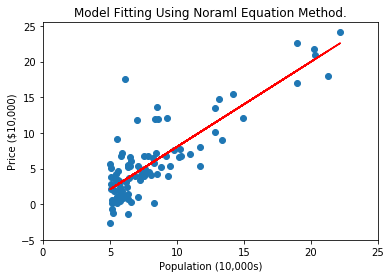

In [31]:
plt.scatter(data.Population,data.Price);
plt.plot(data.Population,[x for x in hyp_fn(X,theta)],color="r");
plt.xticks(np.arange(0,30,5));
plt.yticks(np.arange(-5,30,5));
plt.title("Model Fitting Using Noraml Equation Method.");
plt.xlabel("Population (10,000s)");
plt.ylabel("Price ($10,000)");